In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import kagglehub
import os

/Users/loganridings/.local/share/virtualenvs/ASL_Classification-zp_clL6S/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /Users/loganridings/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [8]:
img_height = img_width = 200
batch_size = 50
train_ds = tf.keras.utils.image_dataset_from_directory(
  os.path.join(path, 'asl_alphabet_train/asl_alphabet_train'),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  os.path.join(path, 'asl_alphabet_train/asl_alphabet_train'),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [9]:
classes = {class_name: i for i, class_name in enumerate(train_ds.class_names)}
def preprocess(x, y):
    print(y)
    return x, tf.one_hot(y, len(classes))
train_ds = train_ds.map(lambda x, y: preprocess(x, y))
val_ds = val_ds.map(lambda x, y: preprocess(x, y))
classes

Tensor("args_1:0", shape=(None,), dtype=int32)
Tensor("args_1:0", shape=(None,), dtype=int32)


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

2025-03-17 19:58:16.214040: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


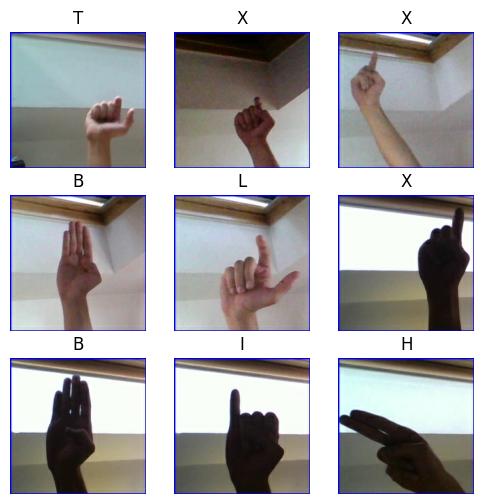

In [14]:
plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images.numpy()[i].astype("uint8"))
    im_class = next(key for key, value in classes.items() if value == np.argmax(labels[i]))
    plt.title(im_class)
    plt.axis("off")

In [19]:
def make_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((200,200,3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 2, activation='gelu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, 2, activation='gelu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, 2, activation='gelu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, 2, activation='gelu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(50, activation='gelu'),
        tf.keras.layers.Dense(29, activation='softmax'),
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],
    )
    return model


model = make_model()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 98, 98, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 23, 23, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │       193,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 29)             │         1,479 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,929 (812.22 KB)

 Trainable params: 207,929 (812.22 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
train_ds = train_ds.cache().shuffle(128).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(128).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping()

In [22]:
model.fit(train_ds, validation_data = val_ds, epochs=10, callbacks=[early_stopping])

Epoch 1/10
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 559s 400ms/step - accuracy: 0.4175 - loss: 1.9718 - val_accuracy: 0.8782 - val_loss: 0.3660
Epoch 2/10
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 547s 393ms/step - accuracy: 0.8980 - loss: 0.3012 - val_accuracy: 0.9444 - val_loss: 0.1646
Epoch 3/10
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 550s 395ms/step - accuracy: 0.9527 - loss: 0.1424 - val_accuracy: 0.9770 - val_loss: 0.0733
Epoch 4/10
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 554s 398ms/step - accuracy: 0.9704 - loss: 0.0881 - val_accuracy: 0.9817 - val_loss: 0.0557
Epoch 5/10
1392/1392 ━━━━━━━━━━━━━━━━━━━━ 548s 393ms/step - accuracy: 0.9803 - loss: 0.0571 - val_accuracy: 0.9805 - val_loss: 0.0612


In [ ]:
# model.evaluate(val_ds)

348/348 ━━━━━━━━━━━━━━━━━━━━ 108s 307ms/step - accuracy: 0.9518 - loss: 0.1389


[0.1422550529241562, 0.9520689845085144]

In [23]:
data = [(img, label, model.predict([img], verbose=0)) for img, label in val_ds.take(1).as_numpy_iterator()]

/Users/loganridings/.local/share/virtualenvs/ASL_Classification-zp_clL6S/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_52
Received: inputs=('Tensor(shape=(32, 200, 200, 3))',)
  warnings.warn(msg)
/Users/loganridings/.local/share/virtualenvs/ASL_Classification-zp_clL6S/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_52
Received: inputs=('Tensor(shape=(None, 200, 200, 3))',)
  warnings.warn(msg)


2025-03-17 20:47:34.815406: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


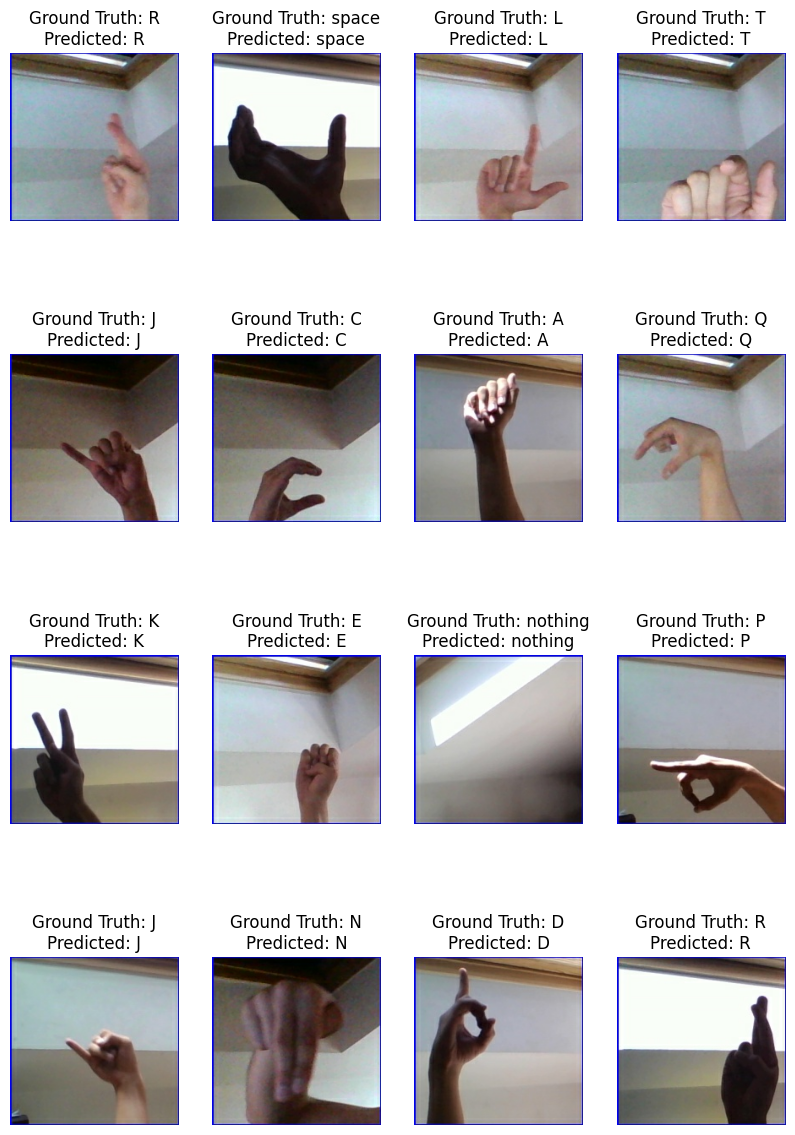

In [ ]:
plt.figure(figsize=(10, 15))
gridsize = 3
for images, labels in train_ds.take(1):
  for i in range(gridsize*gridsize):
    ax = plt.subplot(gridsize, gridsize, i + 1)
    plt.imshow(data[0][0][i].astype("uint8"))
    symbol = next(key for key, value in classes.items() if value == np.argmax(data[0][1][i]))
    prediction = data[0][2][i]
    prediction = next(key for key, value in classes.items() if value == np.argmax(prediction))
    plt.title('Ground Truth: ' + symbol + '\nPredicted: ' + prediction)
    plt.axis("off")

In [25]:
model.save('0_98_accuracy.keras')

In [ ]:
model